## [Problem 1] Select features and categories for practice

In [89]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

In [90]:
iris_data = load_iris()


In [91]:
# dir(iris_data)
# iris_data.target_names

In [92]:
data = pd.DataFrame(np.concatenate([iris_data.data,np.expand_dims(iris_data.target,1)],axis =1),columns =['sepal_length', 'sepal_width', 'petal_length', 'petal_width','Species'])

In [93]:
data

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [94]:
data.loc[data.Species>0,["sepal_length","petal_length","Species"]]

,sepal_length,petal_length,Species
50,7.0,4.7,1.0
51,6.4,4.5,1.0
52,6.9,4.9,1.0
53,5.5,4.0,1.0
54,6.5,4.6,1.0
...,...,...,...
145,6.7,5.2,2.0
146,6.3,5.0,2.0
147,6.5,5.2,2.0
148,6.2,5.4,2.0


In [95]:
import plotly.express as px



fig = px.scatter_matrix(
    data,
    dimensions=data.columns,
    color="Species"
)
fig.update_traces(diagonal_visible=False)
fig.show()

## [Problem 2]: Data analysis

## Scatter plot

In [8]:
import plotly.express as px
from sklearn.decomposition import PCA

# df = px.data.iris()
# X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
X = data.loc[data.Species>0,["sepal_length","petal_length","Species"]]
pca = PCA(n_components=2)
components = pca.fit_transform(X)

fig = px.scatter(components, x=0, y=1, color=X['Species'])
fig.show()

## Box plot on petal length

In [9]:

fig = px.box(X, y="petal_length",x ="Species")
fig.show()


## Box plot on sepal length

In [10]:

fig = px.box(X, y="sepal_length",x ="Species")
fig.show()


# Violin plot on petal length


In [11]:
fig = px.violin(X, y="petal_length",x ="Species")
fig.show()

# Violin plot on sepal length

In [12]:
fig = px.violin(X, y="sepal_length",x ="Species")
fig.show()

## [Problem 3]: Division of preprocessing/training data and verification data

In [13]:
from sklearn.model_selection import train_test_split
my_X = data.loc[data.Species>0,["sepal_length","petal_length"]]
my_Y = data.loc[data.Species>0,"Species"]
# np.array(my_X)
# np.array(my_Y)
X_train, X_test, y_train, y_test = train_test_split( np.array(my_X), np.array(my_Y), test_size=0.25, random_state=42)

## [Problem 4]: Pretreatment/Standardization

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## [Problem 5]: Learning and estimation

In [16]:
from sklearn.neighbors import KNeighborsClassifier
# X_train, X_test, y_train, y_test
neigh_3 = KNeighborsClassifier(n_neighbors=3)
neigh_5 = KNeighborsClassifier(n_neighbors=5)
neigh_1 = KNeighborsClassifier(n_neighbors=1)
neigh_1.fit(X_train, y_train)
neigh_5.fit(X_train, y_train)
neigh_3.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

## [Problem 6]: Evaluation

In [17]:
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [18]:
y_predict_1 = neigh_1.predict(X_test)
y_predict_3 = neigh_3.predict(X_test)
y_predict_5 = neigh_5.predict(X_test)

In [19]:
print("Accuracy of 1 kkn: {}".format(accuracy_score(y_test,y_predict_1)))
print("Accuracy of 3 kkn: {}".format(accuracy_score(y_test,y_predict_1)))
print("Accuracy of 5 kkn: {}".format(accuracy_score(y_test,y_predict_1)))

Accuracy of 1 kkn: 0.92
Accuracy of 3 kkn: 0.92
Accuracy of 5 kkn: 0.92


In [20]:
print("Precision of 1 kkn: {}".format(precision_score(y_test,y_predict_1,average='macro')))
print("Precision of 3 kkn: {}".format(precision_score(y_test,y_predict_3,average='macro')))
print("Precision of 5 kkn: {}".format(precision_score(y_test,y_predict_5,average='macro')))

Precision of 1 kkn: 0.9230769230769231
Precision of 3 kkn: 0.8782051282051282
Precision of 5 kkn: 0.842948717948718


In [21]:
print("Recall of 1 kkn: {}".format(recall_score(y_test,y_predict_1,average='macro')))
print("Recall of 3 kkn: {}".format(recall_score(y_test,y_predict_3,average='macro')))
print("Recall of 5 kkn: {}".format(recall_score(y_test,y_predict_5,average='macro')))

Recall of 1 kkn: 0.9285714285714286
Recall of 3 kkn: 0.8831168831168831
Recall of 5 kkn: 0.8474025974025974


In [22]:
pre = precision_score(y_test,y_predict_1,average='macro')
recall  = recall_score(y_test,y_predict_1,average='macro')
F1 = 2 * (pre * recall) / (pre + recall)
print("F1 of 1 kkn: {}".format(F1))
pre = precision_score(y_test,y_predict_3,average='macro')
recall  = recall_score(y_test,y_predict_3,average='macro')
F1 = 2 * (pre * recall) / (pre + recall)
print("F1 of 3 kkn: {}".format(F1))
pre = precision_score(y_test,y_predict_5,average='macro')
recall  = recall_score(y_test,y_predict_5,average='macro')
F1 = 2 * (pre * recall) / (pre + recall)
print("F1 of 5 kkn: {}".format(F1))

F1 of 1 kkn: 0.9258160237388724
F1 of 3 kkn: 0.8806541570165902
F1 of 5 kkn: 0.8451697899480409


In [23]:
confusion_matrix(y_test, y_predict_1)

array([[12,  2],
       [ 0, 11]], dtype=int64)

In [24]:
confusion_matrix(y_test, y_predict_3)

array([[12,  2],
       [ 1, 10]], dtype=int64)

In [25]:
confusion_matrix(y_test, y_predict_5)


array([[11,  3],
       [ 1, 10]], dtype=int64)

## [Problem 7]: Visualization

In [26]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    Draw the determination area of the model that learned binary classification with two-dimensional features.
    The background color is drawn from the estimated values of the trained model.
    The points on the scatter plot are training or validation data.
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        Feature value
    y : ndarray, shape(n_samples,)
        label
    model : object
        Insert the installed model of the learned model
    step : float, (default : 0.1)
        Set the interval to calculate the estimate
    title : str
        Give the text of the graph Title
    xlabel, ylabel : str
        Give the text of the axis label
    target_names= : list of str
        Give a list of legends
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

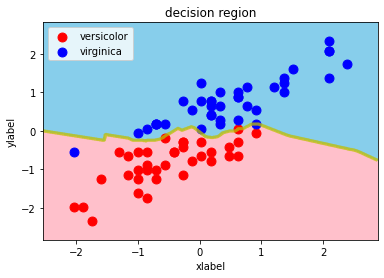

In [27]:
decision_region(X_train,y_train,neigh_3)

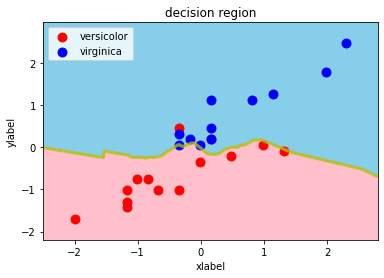

In [28]:
decision_region(X_test,y_test,neigh_3)

Accuracy: 0.84
Precision: 0.842948717948718
Recall: 0.8474025974025974
F1: 0.8397435897435896


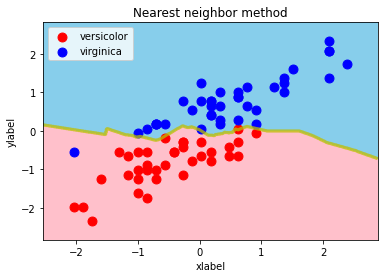

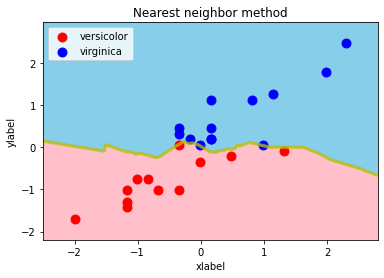

In [29]:
from sklearn.neighbors import KNeighborsClassifier
neigh  = KNeighborsClassifier()
neigh.fit(X_train, y_train)
y_predict = neigh.predict(X_test)
print("Accuracy: {}".format(accuracy_score(y_test,y_predict)))
print("Precision: {}".format(precision_score(y_test,y_predict,average="macro")))
print("Recall: {}".format(recall_score(y_test,y_predict,average="macro")))
print("F1: {}".format(f1_score(y_test,y_predict,average="macro")))
knns = [accuracy_score(y_test,y_predict),precision_score(y_test,y_predict,average="macro"),recall_score(y_test,y_predict,average="macro"),f1_score(y_test,y_predict,average="macro")]
# Confusion matrix
confusion_matrix(y_test, y_predict)
decision_region(X_train,y_train,neigh,title="Nearest neighbor method")
decision_region(X_test,y_predict,neigh,title="Nearest neighbor method")

Accuracy: 0.92
Precision: 0.9230769230769231
Recall: 0.9285714285714286
F1: 0.9198717948717948


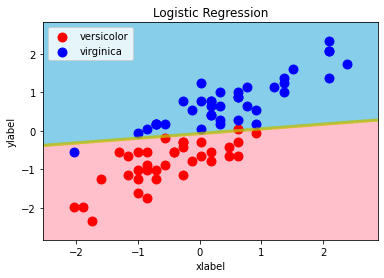

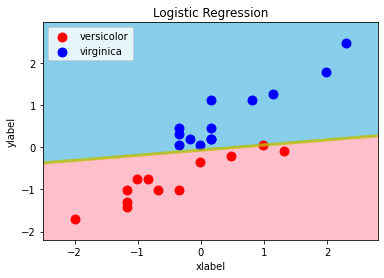

In [30]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
y_predict = clf.predict(X_test)
print("Accuracy: {}".format(accuracy_score(y_test,y_predict)))
print("Precision: {}".format(precision_score(y_test,y_predict,average="macro")))
print("Recall: {}".format(recall_score(y_test,y_predict,average="macro")))
print("F1: {}".format(f1_score(y_test,y_predict,average="macro")))
lgs = [accuracy_score(y_test,y_predict),precision_score(y_test,y_predict,average="macro"),recall_score(y_test,y_predict,average="macro"),f1_score(y_test,y_predict,average="macro")]
# Confusion matrix
confusion_matrix(y_test, y_predict)
decision_region(X_train,y_train,clf,title="Logistic Regression")
decision_region(X_test,y_predict,clf,title="Logistic Regression")

Accuracy: 0.88
Precision: 0.8928571428571428
Recall: 0.8928571428571428
F1: 0.88


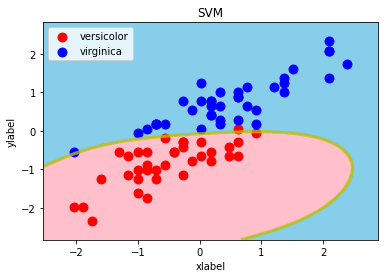

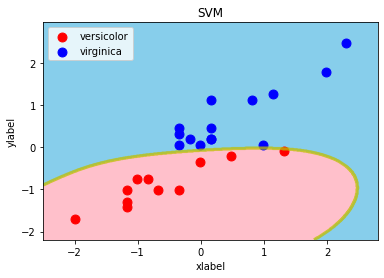

In [31]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
print("Accuracy: {}".format(accuracy_score(y_test,y_predict)))
print("Precision: {}".format(precision_score(y_test,y_predict,average="macro")))
print("Recall: {}".format(recall_score(y_test,y_predict,average="macro")))
print("F1: {}".format(f1_score(y_test,y_predict,average="macro")))
svms = [accuracy_score(y_test,y_predict),precision_score(y_test,y_predict,average="macro"),recall_score(y_test,y_predict,average="macro"),f1_score(y_test,y_predict,average="macro")]
# Confusion matrix
confusion_matrix(y_test, y_predict)
decision_region(X_train,y_train,clf,title="SVM")
decision_region(X_test,y_predict,clf,title="SVM")

Accuracy: 0.92
Precision: 0.9230769230769231
Recall: 0.9285714285714286
F1: 0.9198717948717948


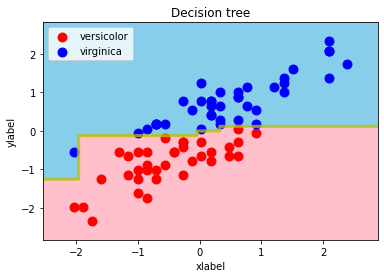

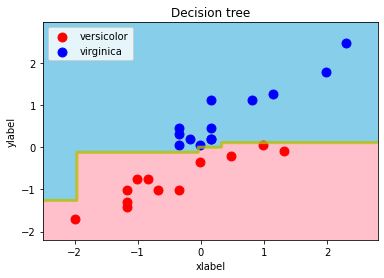

In [32]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
# cross_val_score(clf, X_train, y_train, cv=10)
clf.fit(X_train,y_train)
y_predict = clf.predict(X_test)
print("Accuracy: {}".format(accuracy_score(y_test,y_predict)))
print("Precision: {}".format(precision_score(y_test,y_predict,average="macro")))
print("Recall: {}".format(recall_score(y_test,y_predict,average="macro")))
print("F1: {}".format(f1_score(y_test,y_predict,average="macro")))
dts = [accuracy_score(y_test,y_predict),precision_score(y_test,y_predict,average="macro"),recall_score(y_test,y_predict,average="macro"),f1_score(y_test,y_predict,average="macro")]
# Confusion matrix
confusion_matrix(y_test, y_predict)
decision_region(X_train,y_train,clf,title="Decision tree")
decision_region(X_test,y_predict,clf,title="Decision tree")

## [Problem 9]: (Advanced task) Comparison with and without standardization

In [33]:
X_train, X_test, y_train, y_test = train_test_split( np.array(my_X), np.array(my_Y), test_size=0.25, random_state=42)

Accuracy: 0.8
Precision: 0.8198529411764706
Recall: 0.7824675324675325
F1: 0.7877758913412564


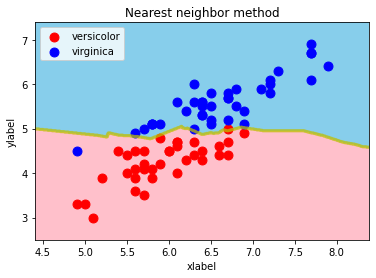

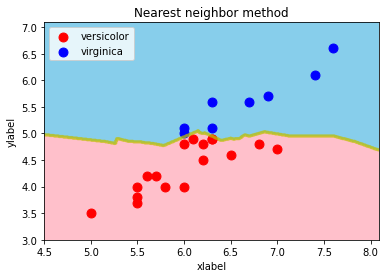

In [34]:
from sklearn.neighbors import KNeighborsClassifier
neigh  = KNeighborsClassifier()
neigh.fit(X_train, y_train)
y_predict = neigh.predict(X_test)
print("Accuracy: {}".format(accuracy_score(y_test,y_predict)))
print("Precision: {}".format(precision_score(y_test,y_predict,average="macro")))
print("Recall: {}".format(recall_score(y_test,y_predict,average="macro")))
print("F1: {}".format(f1_score(y_test,y_predict,average="macro")))
knn = [accuracy_score(y_test,y_predict),precision_score(y_test,y_predict,average="macro"),recall_score(y_test,y_predict,average="macro"),f1_score(y_test,y_predict,average="macro")]
# Confusion matrix
confusion_matrix(y_test, y_predict)
decision_region(X_train,y_train,neigh,title="Nearest neighbor method")
decision_region(X_test,y_predict,neigh,title="Nearest neighbor method")

Accuracy: 0.84
Precision: 0.8376623376623377
Recall: 0.8376623376623377
F1: 0.8376623376623377


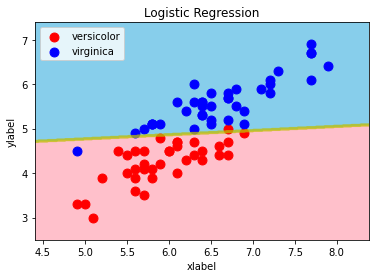

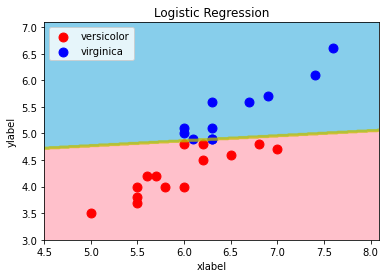

In [35]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
y_predict = clf.predict(X_test)
print("Accuracy: {}".format(accuracy_score(y_test,y_predict)))
print("Precision: {}".format(precision_score(y_test,y_predict,average="macro")))
print("Recall: {}".format(recall_score(y_test,y_predict,average="macro")))
print("F1: {}".format(f1_score(y_test,y_predict,average="macro")))
lg = [accuracy_score(y_test,y_predict),precision_score(y_test,y_predict,average="macro"),recall_score(y_test,y_predict,average="macro"),f1_score(y_test,y_predict,average="macro")]
# Confusion matrix
confusion_matrix(y_test, y_predict)
decision_region(X_train,y_train,clf,title="Logistic Regression")
decision_region(X_test,y_predict,clf,title="Logistic Regression")

Accuracy: 0.84
Precision: 0.8376623376623377
Recall: 0.8376623376623377
F1: 0.8376623376623377


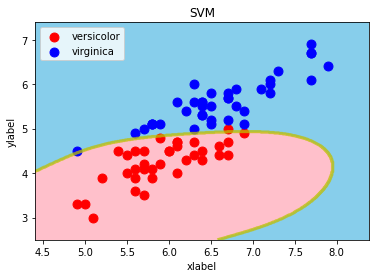

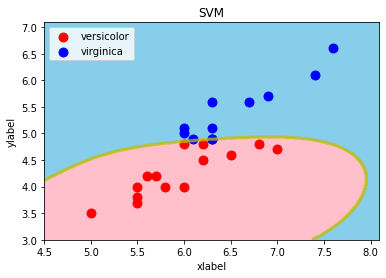

In [36]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
print("Accuracy: {}".format(accuracy_score(y_test,y_predict)))
print("Precision: {}".format(precision_score(y_test,y_predict,average="macro")))
print("Recall: {}".format(recall_score(y_test,y_predict,average="macro")))
print("F1: {}".format(f1_score(y_test,y_predict,average="macro")))
svm = [accuracy_score(y_test,y_predict),precision_score(y_test,y_predict,average="macro"),recall_score(y_test,y_predict,average="macro"),f1_score(y_test,y_predict,average="macro")]
# Confusion matrix
confusion_matrix(y_test, y_predict)
decision_region(X_train,y_train,clf,title="SVM")
decision_region(X_test,y_predict,clf,title="SVM")

Accuracy: 0.84
Precision: 0.8506944444444444
Recall: 0.827922077922078
F1: 0.8333333333333333


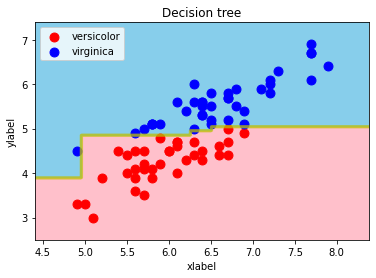

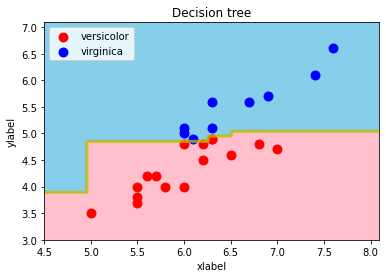

In [37]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
# cross_val_score(clf, X_train, y_train, cv=10)
clf.fit(X_train,y_train)
y_predict = clf.predict(X_test)
print("Accuracy: {}".format(accuracy_score(y_test,y_predict)))
print("Precision: {}".format(precision_score(y_test,y_predict,average="macro")))
print("Recall: {}".format(recall_score(y_test,y_predict,average="macro")))
print("F1: {}".format(f1_score(y_test,y_predict,average="macro")))
dt = [accuracy_score(y_test,y_predict),precision_score(y_test,y_predict,average="macro"),recall_score(y_test,y_predict,average="macro"),f1_score(y_test,y_predict,average="macro")]
# Confusion matrix
confusion_matrix(y_test, y_predict)
decision_region(X_train,y_train,clf,title="Decision tree")
decision_region(X_test,y_predict,clf,title="Decision tree")

Accuracy: 0.8
Precision: 0.8198529411764706
Recall: 0.7824675324675325
F1: 0.7877758913412564


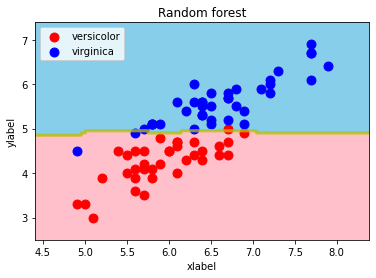

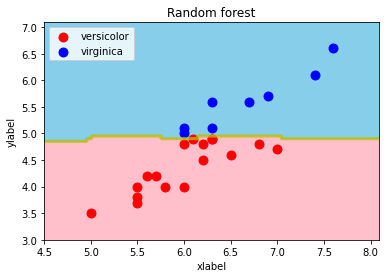

In [38]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
print("Accuracy: {}".format(accuracy_score(y_test,y_predict)))
print("Precision: {}".format(precision_score(y_test,y_predict,average="macro")))
print("Recall: {}".format(recall_score(y_test,y_predict,average="macro")))
print("F1: {}".format(f1_score(y_test,y_predict,average="macro")))
rf = [accuracy_score(y_test,y_predict),precision_score(y_test,y_predict,average="macro"),recall_score(y_test,y_predict,average="macro"),f1_score(y_test,y_predict,average="macro")]
# Confusion matrix
confusion_matrix(y_test, y_predict)
decision_region(X_train,y_train,clf,title="Random forest")
decision_region(X_test,y_predict,clf,title="Random forest")


In [41]:
a = pd.concat([pd.DataFrame(knn),pd.DataFrame(lg),pd.DataFrame(svm),pd.DataFrame(dt),pd.DataFrame(rf),pd.DataFrame(knns),pd.DataFrame(lgs),pd.DataFrame(svms),pd.DataFrame(dts),pd.DataFrame(rf)],axis=1)
a.columns = ["3 KNN","Linear Regression","SVM","Decision Tree","Random Forest","3 KNN (standardization)","Linear Regression(standardization)","SVM(standardization)","Decision Tree (standardization)","Random Forest (standardization)"]
a.index = ["Accuracy","Recall","Precision","F-Measure"]
a

,3 KNN,Linear Regression,SVM,Decision Tree,Random Forest,3 KNN (standardization),Linear Regression(standardization),SVM(standardization),Decision Tree (standardization),Random Forest (standardization)
Accuracy,0.800000,0.840000,0.840000,0.840000,0.800000,0.840000,0.920000,0.880000,0.920000,0.800000
Recall,0.819853,0.837662,0.837662,0.850694,0.819853,0.842949,0.923077,0.892857,0.923077,0.819853
Precision,0.782468,0.837662,0.837662,0.827922,0.782468,0.847403,0.928571,0.892857,0.928571,0.782468
F-Measure,0.787776,0.837662,0.837662,0.833333,0.787776,0.839744,0.919872,0.880000,0.919872,0.787776


## [Problem 10]: (Advance task) Highly accurate method using all objective variables

In [42]:
my_X = data.loc[:,["sepal_length","petal_length"]]
my_Y = data.loc[:,"Species"]
# np.array(my_X)
# np.array(my_Y)
X_train, X_test, y_train, y_test = train_test_split( np.array(my_X), np.array(my_Y), test_size=0.25, random_state=42)

In [43]:
def multi_decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['setosa','versicolor', 'virginica']):
    """
    Draw the determination area of the model that learned binary classification with two-dimensional features.
    The background color is drawn from the estimated values of the trained model.
    The points on the scatter plot are training or validation data.
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        Feature value
    y : ndarray, shape(n_samples,)
        label
    model : object
        Insert the installed model of the learned model
    step : float, (default : 0.1)
        Set the interval to calculate the estimate
    title : str
        Give the text of the graph Title
    xlabel, ylabel : str
        Give the text of the axis label
    target_names= : list of str
        Give a list of legends
    """
    # setting
    scatter_color = ['red', 'blue','green']
    contourf_color = ['pink', 'skyblue','gray']
    n_class = 3
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

Accuracy: 0.9736842105263158
Precision: 0.9722222222222222
Recall: 0.9722222222222222
F1: 0.9710144927536232


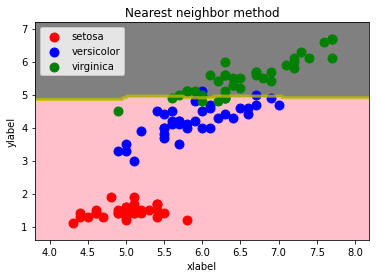

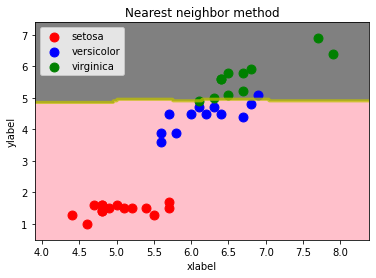

In [44]:
from sklearn.neighbors import KNeighborsClassifier
neigh  = KNeighborsClassifier()
neigh.fit(X_train, y_train)
y_predict = neigh.predict(X_test)
y_predict
print("Accuracy: {}".format(accuracy_score(y_test,y_predict)))
print("Precision: {}".format(precision_score(y_test,y_predict,average="macro")))
print("Recall: {}".format(recall_score(y_test,y_predict,average="macro")))
print("F1: {}".format(f1_score(y_test,y_predict,average="macro")))
# Confusion matrix
confusion_matrix(y_test, y_predict)
multi_decision_region(X_train,y_train,clf,title="Nearest neighbor method")
multi_decision_region(X_test,y_predict,clf,title="Nearest neighbor method")

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0


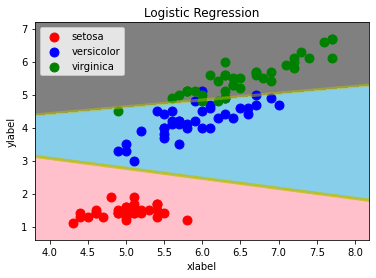

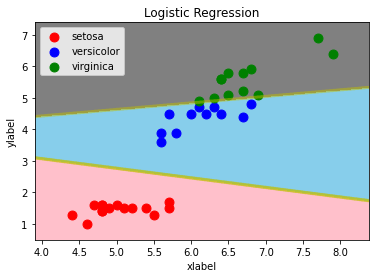

In [45]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
y_predict = clf.predict(X_test)
print("Accuracy: {}".format(accuracy_score(y_test,y_predict)))
print("Precision: {}".format(precision_score(y_test,y_predict,average="macro")))
print("Recall: {}".format(recall_score(y_test,y_predict,average="macro")))
print("F1: {}".format(f1_score(y_test,y_predict,average="macro")))
# Confusion matrix
confusion_matrix(y_test, y_predict)
multi_decision_region(X_train,y_train,clf,title="Logistic Regression")
multi_decision_region(X_test,y_predict,clf,title="Logistic Regression")

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0


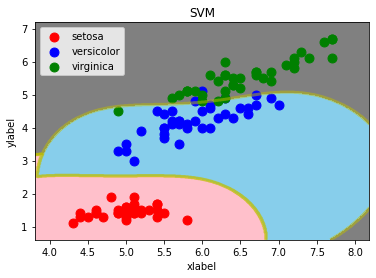

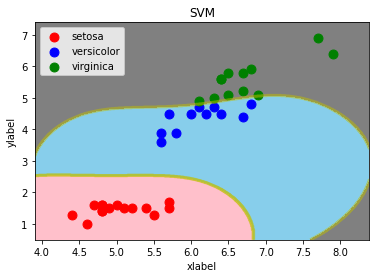

In [46]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
print("Accuracy: {}".format(accuracy_score(y_test,y_predict)))
print("Precision: {}".format(precision_score(y_test,y_predict,average="macro")))
print("Recall: {}".format(recall_score(y_test,y_predict,average="macro")))
print("F1: {}".format(f1_score(y_test,y_predict,average="macro")))
# Confusion matrix
confusion_matrix(y_test, y_predict)
multi_decision_region(X_train,y_train,clf,title="SVM")
multi_decision_region(X_test,y_predict,clf,title="SVM")

Accuracy: 0.9736842105263158
Precision: 0.9722222222222222
Recall: 0.9722222222222222
F1: 0.9710144927536232


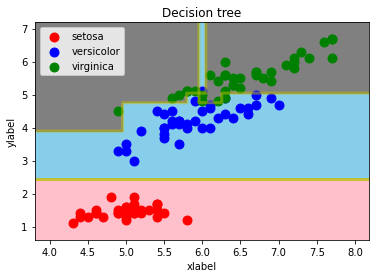

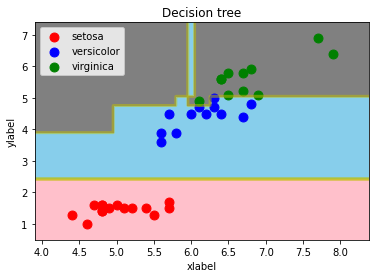

In [47]:
clf = DecisionTreeClassifier()
# cross_val_score(clf, X_train, y_train, cv=10)
clf.fit(X_train,y_train)
y_predict = clf.predict(X_test)
print("Accuracy: {}".format(accuracy_score(y_test,y_predict)))
print("Precision: {}".format(precision_score(y_test,y_predict,average="macro")))
print("Recall: {}".format(recall_score(y_test,y_predict,average="macro")))
print("F1: {}".format(f1_score(y_test,y_predict,average="macro")))
# Confusion matrix
confusion_matrix(y_test, y_predict)
multi_decision_region(X_train,y_train,clf,title="Decision tree")
multi_decision_region(X_test,y_predict,clf,title="Decision tree")

Accuracy: 0.9736842105263158
Precision: 0.9743589743589745
Recall: 0.9696969696969697
F1: 0.9707936507936509


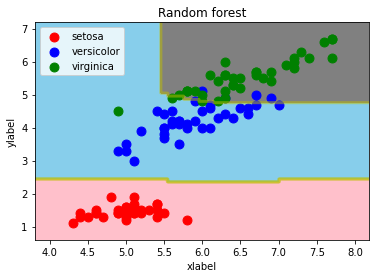

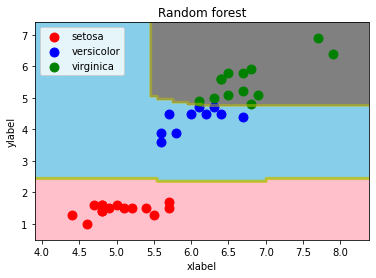

In [48]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
print("Accuracy: {}".format(accuracy_score(y_test,y_predict)))
print("Precision: {}".format(precision_score(y_test,y_predict,average="macro")))
print("Recall: {}".format(recall_score(y_test,y_predict,average="macro")))
print("F1: {}".format(f1_score(y_test,y_predict,average="macro")))
# Confusion matrix
confusion_matrix(y_test, y_predict)
multi_decision_region(X_train,y_train,clf,title="Random forest")
multi_decision_region(X_test,y_predict,clf,title="Random forest")